In [1]:
from Networks import MLP
from Trainers import Burges_1D_Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 初始化模型
input_shape = (1,)  # 输入形状
output_shape = (1,)
model = MLP(input_shape, output_shape, hidden_layers=[64, 64, 64, 64, 64, 64, 64],activation_function="tanh")

# 加载训练好的权重
model.load_state_dict(torch.load("pinntest.pth",weights_only=True))


<All keys matched successfully>

In [7]:
# 将模型设置为评估模式
model.eval()
# 在区间 [0, 1] 上均匀采样
x_collocation = torch.linspace(0, 1, 1000).view(-1, 1)
with torch.no_grad():  # 关闭梯度计算，因为我们只是进行前向传播
    T_PINN = model(x_collocation)

In [8]:
x_test = torch.tensor([[0.]])
with torch.no_grad():
    y_test = model(x_test)
print(y_test)

tensor([[1.0000]])


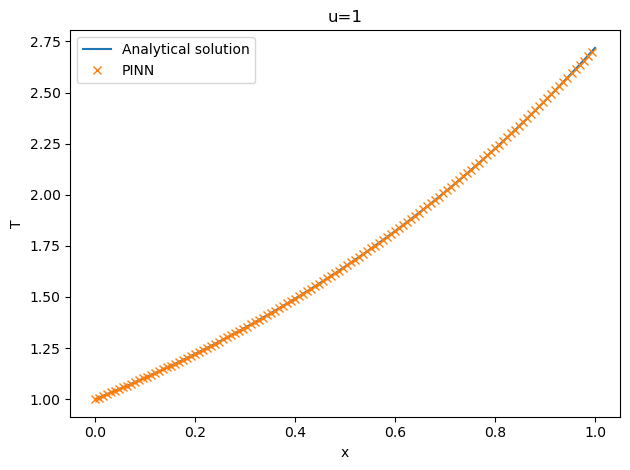

In [10]:
alpha = 1
u =1
x = np.linspace(0, 1, 1000)

T = np.exp(u/alpha*x)

plt.figure(layout='tight')
plt.plot(x,T,label='Analytical solution')
plt.plot(x,T_PINN,'x',markevery=8, label='PINN')
plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.title(f'u={u}')
plt.savefig(f'u={u}_pinn.png')